2025-07-02 09:49:08,087 - chemgraph.tools.openai_loader - INFO - Using custom base URL: http://localhost:52874/v1


INFO:chemgraph.tools.openai_loader:Using custom base URL: http://localhost:52874/v1


2025-07-02 09:49:08,105 - chemgraph.tools.openai_loader - INFO - Requested model: argo:gpt-4o


INFO:chemgraph.tools.openai_loader:Requested model: argo:gpt-4o


2025-07-02 09:49:08,106 - chemgraph.tools.openai_loader - INFO - OpenAI model loaded successfully


INFO:chemgraph.tools.openai_loader:OpenAI model loaded successfully


2025-07-02 09:49:08,106 - chemgraph.graphs.single_agent - INFO - Constructing single agent graph


INFO:chemgraph.graphs.single_agent:Constructing single agent graph


2025-07-02 09:49:08,108 - chemgraph.graphs.single_agent - INFO - Graph construction completed


INFO:chemgraph.graphs.single_agent:Graph construction completed


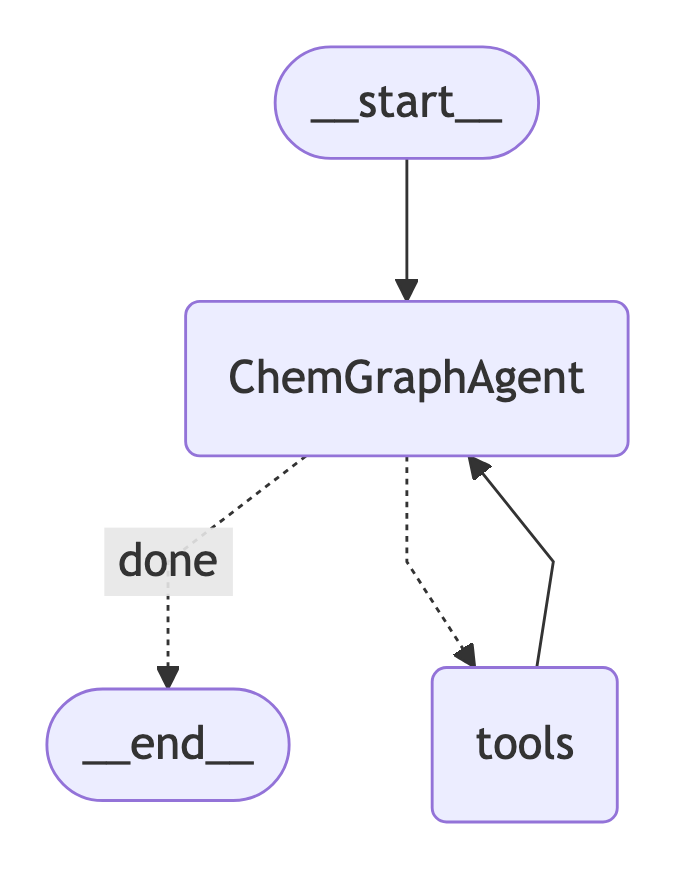

In [9]:
from chemgraph.agent.llm_agent import ChemGraph

workflow_type = "single_agent"
import os


os.environ["MODEL"] = 'argo:gpt-4.1'
os.environ["BASE_URL"] = "http://localhost:52874/v1"
os.environ["API_KEY"] = 'randomiko'
os.environ["OPENAI_API_KEY"] = 'randomiko'
os.environ["STREAM"] = 'True'


cg = ChemGraph(model_name='argo:gpt-4o', workflow_type = workflow_type, structured_output=False, return_option="last_message", base_url="http://localhost:52874/v1")
cg.visualize()

In [18]:
# Run geometry optimization using default parameters
query = "What are the optimized coordinates for the smiles string 'C'? Call tools to get the coordinates."
result = cg.run(query, config={"configurable": {"thread_id": 4}})
print(result)


================================ Human Message =================================

What are the optimized coordinates for the smiles string 'C'? Call tools to get the coordinates.
================================== Ai Message ==================================
Tool Calls:
  smiles_to_atomsdata (call_awewo1oW1JWbQj0AyddMTH)
 Call ID: call_awewo1oW1JWbQj0AyddMTH
  Args:
    smiles: C
================================= Tool Message =================================
Name: smiles_to_atomsdata

{"numbers": [6, 1, 1, 1, 1], "positions": [[-5.515752553510999e-08, 9.195817918950514e-09, -1.7151920351483622e-08], [-0.38545298681366186, -0.8083199790622183, -0.6548396702426592], [-0.7452127558562118, 0.22181498591294727, 0.7913445847364606], [0.1793872841779948, 0.9123041408765922, -0.6052202767903315], [0.9512785136494, -0.3257991569231384, 0.46871537944845043]], "cell": [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], "pbc": [false, false, false]}
================================== Ai Message

In [1]:
from pubchempy import get_compounds, Compound
comp = Compound.from_cid(1423)
print(dir(comp))
print(comp.canonical_smiles)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_atoms', '_bonds', '_record', '_setup_atoms', '_setup_bonds', 'absolute_smiles', 'aids', 'atom_stereo_count', 'atoms', 'bond_stereo_count', 'bonds', 'cactvs_fingerprint', 'canonical_smiles', 'charge', 'cid', 'complexity', 'conformer_id_3d', 'conformer_rmsd_3d', 'connectivity_smiles', 'coordinate_type', 'covalent_unit_count', 'defined_atom_stereo_count', 'defined_bond_stereo_count', 'effective_rotor_count_3d', 'elements', 'exact_mass', 'feature_selfoverlap_3d', 'fingerprint', 'from_cid', 'h_bond_acceptor_count', 'h_bond_donor_count', 'heavy_atom_count', 'inchi', 'inchikey', 'isomeric_smiles', 'isotope_atom_count', 'iupac_name', 'mm

In [23]:
MODEL = "argo:gpt-4o"
BASE_URL = "http://localhost:52874/v1"
API_KEY = "whatever+random"
STREAM = os.getenv("STREAM", "false").lower() == "true"
import openai
client = openai.OpenAI(
    api_key=API_KEY,
    base_url=f"{BASE_URL}",
)
def run_function_calling_example():
    print("Running Simple Math Function Calling Example")

    messages = [
        {
            "role": "user",
            "content": "What is 8 plus 5? Use the add function to calculate this.",
        }
    ]
    tools = [
        {
            "type": "function",
            "function": {
                "name": "add",
                "description": "Add two numbers together.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "a": {"type": "number", "description": "First number"},
                        "b": {"type": "number", "description": "Second number"},
                    },
                    "required": ["a", "b"],
                },
            },
        }
    ]

    try:
        response = client.chat.completions.create(
            model=MODEL,
            messages=messages,
            tools=tools,
            tool_choice="auto",
            stream=STREAM,
        )
        print("Response Body:")
        if STREAM:
            for chunk in response:
                # Stream each chunk as it arrives
                print(chunk)
        else:
            print(response)
    except Exception as e:
        print("\nError:", e)


run_function_calling_example()



Running Simple Math Function Calling Example
Response Body:
ChatCompletion(id='1a8bee0199d047ac91152150acc21bfd', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content="The sum of 8 and 5 is calculated using the add function. Let's see the result.", refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_cHrykmLzjSUmQDC0P96gFs', function=Function(arguments='{"a": 8, "b": 5}', name='add'), type='function')]))], created=1751398961, model='gpt4o', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=43, prompt_tokens=558, total_tokens=601, completion_tokens_details=None, prompt_tokens_details=None))


ImportError: cannot import name 'rdkit_tool' from 'chemgraph.tools' (/Users/keceli/git/asa/ChemGraph/src/chemgraph/tools/__init__.py)

In [24]:
# Simple LangChain OpenAI Example
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

# Initialize the model
llm = ChatOpenAI(
    model="argo:gpt-4o",
    temperature=0.7,
    api_key="your-api-key-here",
    base_url="http://localhost:52874/v1"

)

# Create messages
messages = [
    SystemMessage(content="You are a helpful assistant that provides concise answers."),
    HumanMessage(content="What is the capital of Turkiye?")
]

# Get response
response = llm.invoke(messages)
print("Response:", response.content)

Response: The capital of Türkiye is Ankara.


In [ ]:
for m in 

In [3]:
# Run geometry optimization using MACE MP
query = "What are the vibrational frequencies of carbon dioxide using MACE MP?"
cg.run(query, {"thread_id": 2})

================================ Human Message =================================

What are the vibrational frequencies of carbon dioxide using MACE MP?
================================== Ai Message ==================================
Tool Calls:
  molecule_name_to_smiles (call_VDKAa8n1kOZAXoAnZnkM15Su)
 Call ID: call_VDKAa8n1kOZAXoAnZnkM15Su
  Args:
    name: carbon dioxide
================================= Tool Message =================================
Name: molecule_name_to_smiles

"C(=O)=O"
================================== Ai Message ==================================
Tool Calls:
  smiles_to_atomsdata (call_Y5JT0CiSASbWzS4rgkC2isDH)
 Call ID: call_Y5JT0CiSASbWzS4rgkC2isDH
  Args:
    smiles: C(=O)=O
================================= Tool Message =================================
Name: smiles_to_atomsdata

{"numbers": [6, 8, 8], "positions": [[4.5556649759108717e-08, 0.5033862641973668, 0.0], [-1.237393800775972, 0.5176981640440148, 0.0], [1.2373937552193337, 0.4890745459797487, 0.0

/opt/anaconda3/envs/cca_env/lib/python3.10/site-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))


Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/tpham2/.cache/mace/macempa0mediummodel
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using head default out of ['default']
      Step     Time          Energy          fmax
BFGS:    0 10:43:17      -22.207028        5.222604


/opt/anaconda3/envs/cca_env/lib/python3.10/site-packages/mace/calculators/mace.py:143: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


BFGS:    1 10:43:18      -22.524121        1.564176
BFGS:    2 10:43:18      -22.544926        0.320671
BFGS:    3 10:43:18      -22.545908        0.014208
BFGS:    4 10:43:18      -22.545910        0.000218
================================= Tool Message =================================
Name: run_ase

{"converged": true, "final_structure": {"numbers": [6, 8, 8], "positions": [[6.088095392442445e-07, 0.5033863082138489, -2.829471062977948e-20], [-1.1769241100396999, 0.5169987408330056, -1.3724969037700985e-19], [1.176923501230172, 0.4897739251742758, 8.379510281077607e-21]], "cell": [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], "pbc": [false, false, false]}, "simulation_input": {"atomsdata": {"numbers": [6, 8, 8], "positions": [[4.5556649759108717e-08, 0.5033862641973668, 0.0], [-1.237393800775972, 0.5176981640440148, 0.0], [1.2373937552193337, 0.4890745459797487, 0.0]], "cell": [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], "pbc": [false, false, false]}, "driver": "vib", 

{'messages': [{'content': 'What is the smiles string caffeine?',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': 'None',
   'id': 'af5e2234-7312-4ad5-bb11-84fa8b9f888c',
   'example': 'False'},
  {'content': '',
   'additional_kwargs': {'tool_calls': [{'id': 'call_M1vyWl0pg671cc5OjabpFpNB',
      'function': {'arguments': '{"name":"caffeine"}',
       'name': 'molecule_name_to_smiles'},
      'type': 'function'}],
    'refusal': 'None'},
   'response_metadata': {'token_usage': {'completion_tokens': '19',
     'prompt_tokens': '3683',
     'total_tokens': '3702',
     'completion_tokens_details': {'accepted_prediction_tokens': '0',
      'audio_tokens': '0',
      'reasoning_tokens': '0',
      'rejected_prediction_tokens': '0'},
     'prompt_tokens_details': {'audio_tokens': '0', 'cached_tokens': '0'}},
    'model_name': 'gpt-4o-mini-2024-07-18',
    'system_fingerprint': 'fp_34a54ae93c',
    'finish_reason': 'tool_calls',
    'logprobs': 'None'},

In [5]:
for m in result['messages']:
    print(m)
    print('****'*10)

{'content': 'What is the structure of water?', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': 'None', 'id': '740ba57e-3ec0-4d15-8906-d33a6b424c86', 'example': 'False'}
****************************************
{'content': 'The structure of water (H₂O) consists of two hydrogen atoms covalently bonded to one oxygen atom. The molecule has a bent shape due to the two lone pairs of electrons on the oxygen atom, which repel the hydrogen atoms. The bond angle between the hydrogen-oxygen-hydrogen atoms is approximately 104.5 degrees. \n\nIn terms of its representation, the SMILES notation for water is "O".', 'additional_kwargs': {'refusal': 'None'}, 'response_metadata': {'token_usage': {'completion_tokens': '86', 'prompt_tokens': '3738', 'total_tokens': '3824', 'completion_tokens_details': {'accepted_prediction_tokens': '0', 'audio_tokens': '0', 'reasoning_tokens': '0', 'rejected_prediction_tokens': '0'}, 'prompt_tokens_details': {'audio_tokens': '0', 'cached_tokens'

In [4]:
query = "What is the enthalpy of water at 400K using mace_mp?"
cg.run(query, {"thread_id": 3})

================================ Human Message =================================

What is the enthalpy of water at 400K using mace_mp?
================================== Ai Message ==================================
Tool Calls:
  smiles_to_atomsdata (call_EqxJC2O1RxmmBYHncM2Yq3KE)
 Call ID: call_EqxJC2O1RxmmBYHncM2Yq3KE
  Args:
    smiles: O
================================= Tool Message =================================
Name: smiles_to_atomsdata

{"numbers": [8, 1, 1], "positions": [[0.006278547432814329, 0.40407281100004966, 0.0], [-0.7860813452298498, -0.18987091442763143, 0.0], [0.7798027977970334, -0.21420189657241812, 0.0]], "cell": [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], "pbc": [false, false, false]}
================================== Ai Message ==================================
Tool Calls:
  run_ase (call_ydNDvfg4VzqlkZcNamiLFfLg)
 Call ID: call_ydNDvfg4VzqlkZcNamiLFfLg
  Args:
    params: {'atomsdata': {'numbers': [8, 1, 1], 'positions': [[0.006278547432814329, 0

/opt/anaconda3/envs/cca_env/lib/python3.10/site-packages/mace/calculators/mace.py:143: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


BFGS:    3 10:43:33      -13.785897        0.075446
BFGS:    4 10:43:33      -13.786069        0.024777
BFGS:    5 10:43:33      -13.786082        0.004130
Enthalpy components at T = 400.00 K:
E_pot                -13.786 eV
E_ZPE                  0.577 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)          0.052 eV
Cv_vib (0->T)          0.001 eV
(C_v -> C_p)           0.034 eV
-------------------------------
H                    -13.071 eV
Entropy components at T = 400.00 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0015652 eV/K        0.626 eV
S_rot              0.0004947 eV/K        0.198 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0000015 eV/K        0.001 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0020603 eV/K        0.824 eV
Enthalpy components at T = 400.00 K:
E_pot                -13.786 eV
E_ZPE                  0.577 

{'messages': [{'content': 'What is the smiles string caffeine?',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': 'None',
   'id': 'af5e2234-7312-4ad5-bb11-84fa8b9f888c',
   'example': 'False'},
  {'content': '',
   'additional_kwargs': {'tool_calls': [{'id': 'call_M1vyWl0pg671cc5OjabpFpNB',
      'function': {'arguments': '{"name":"caffeine"}',
       'name': 'molecule_name_to_smiles'},
      'type': 'function'}],
    'refusal': 'None'},
   'response_metadata': {'token_usage': {'completion_tokens': '19',
     'prompt_tokens': '3683',
     'total_tokens': '3702',
     'completion_tokens_details': {'accepted_prediction_tokens': '0',
      'audio_tokens': '0',
      'reasoning_tokens': '0',
      'rejected_prediction_tokens': '0'},
     'prompt_tokens_details': {'audio_tokens': '0', 'cached_tokens': '0'}},
    'model_name': 'gpt-4o-mini-2024-07-18',
    'system_fingerprint': 'fp_34a54ae93c',
    'finish_reason': 'tool_calls',
    'logprobs': 'None'},

In [5]:
query = "What is the optimized geometry of a CO2 molecule using NWChem, B3LYP and STO-3G?"
cg.run(query, {"thread_id": 4})

================================ Human Message =================================

What is the optimized geometry of a CO2 molecule using NWChem, B3LYP and STO-3G?
================================== Ai Message ==================================
Tool Calls:
  molecule_name_to_smiles (call_IB3rVCuEiO4gcCNf9nHo1MHr)
 Call ID: call_IB3rVCuEiO4gcCNf9nHo1MHr
  Args:
    name: CO2
================================= Tool Message =================================
Name: molecule_name_to_smiles

"C(=O)=O"
================================== Ai Message ==================================
Tool Calls:
  smiles_to_atomsdata (call_8ZjWaxdQV67bddlh83SFKVS5)
 Call ID: call_8ZjWaxdQV67bddlh83SFKVS5
  Args:
    smiles: C(=O)=O
================================= Tool Message =================================
Name: smiles_to_atomsdata

{"numbers": [6, 8, 8], "positions": [[4.5556649759108717e-08, 0.5033862641973668, 0.0], [-1.237393800775972, 0.5176981640440148, 0.0], [1.2373937552193337, 0.4890745459797487, 0.0

{'messages': [{'content': 'What is the smiles string caffeine?',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': 'None',
   'id': 'af5e2234-7312-4ad5-bb11-84fa8b9f888c',
   'example': 'False'},
  {'content': '',
   'additional_kwargs': {'tool_calls': [{'id': 'call_M1vyWl0pg671cc5OjabpFpNB',
      'function': {'arguments': '{"name":"caffeine"}',
       'name': 'molecule_name_to_smiles'},
      'type': 'function'}],
    'refusal': 'None'},
   'response_metadata': {'token_usage': {'completion_tokens': '19',
     'prompt_tokens': '3683',
     'total_tokens': '3702',
     'completion_tokens_details': {'accepted_prediction_tokens': '0',
      'audio_tokens': '0',
      'reasoning_tokens': '0',
      'rejected_prediction_tokens': '0'},
     'prompt_tokens_details': {'audio_tokens': '0', 'cached_tokens': '0'}},
    'model_name': 'gpt-4o-mini-2024-07-18',
    'system_fingerprint': 'fp_34a54ae93c',
    'finish_reason': 'tool_calls',
    'logprobs': 'None'},